In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('enhanced_anxiety_dataset.csv')

In [4]:
# Ambil hanya kolom bertipe angka
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Statistik deskriptif
statistik = numeric_df.describe(percentiles=[0.25, 0.5, 0.75]).T

# Tambahkan standar deviasi (sudah ada di describe)
statistik = statistik.rename(columns={
    "25%": "Q1",
    "50%": "Q2 (Median)",
    "75%": "Q3",
    "mean": "Rata-rata",
    "std": "Standar Deviasi",
    "min": "Minimum",
    "max": "Maksimum"
})

statistik[["Rata-rata","Standar Deviasi","Minimum","Maksimum","Q1","Q2 (Median)","Q3"]]

,Rata-rata,Standar Deviasi,Minimum,Maksimum,Q1,Q2 (Median),Q3
Age,40.241727,13.236140,18.0,64.0,29.0,40.0,51.0
Sleep Hours,6.650691,1.227509,2.3,11.3,5.9,6.7,7.5
Physical Activity (hrs/week),2.942136,1.827825,0.0,10.1,1.5,2.8,4.2
Caffeine Intake (mg/day),286.090000,144.813157,0.0,599.0,172.0,273.0,382.0
Alcohol Consumption (drinks/week),9.701636,5.689713,0.0,19.0,5.0,10.0,15.0
Stress Level (1-10),5.856364,2.927202,1.0,10.0,3.0,6.0,8.0
Heart Rate (bpm),90.916000,17.325721,60.0,119.0,76.0,92.0,106.0
Breathing Rate (breaths/min),20.957545,5.160107,12.0,29.0,17.0,21.0,25.0
Sweating Level (1-5),3.080636,1.398877,1.0,5.0,2.0,3.0,4.0
Therapy Sessions (per month),2.427818,2.183106,0.0,12.0,1.0,2.0,4.0


In [5]:
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Tampilkan 10 record pertama
numeric_df.head(10)

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
0,29,6.0,2.7,181,10,10,114,14,4,3,7,5.0
1,46,6.2,5.7,200,8,1,62,23,2,2,8,3.0
2,64,5.0,3.7,117,4,1,91,28,3,1,1,1.0
3,20,5.8,2.8,360,6,4,86,17,3,0,1,2.0
4,49,8.2,2.3,247,4,1,98,19,4,1,3,1.0
5,53,6.4,6.5,235,2,9,84,14,3,2,5,4.0
6,20,7.9,2.5,78,14,8,118,21,5,1,2,4.0
7,54,6.3,5.5,535,15,5,113,19,1,0,7,4.0
8,51,6.6,3.1,587,2,2,81,22,1,2,8,3.0
9,59,5.1,4.8,159,15,5,95,28,5,1,1,4.0


In [6]:
# 1. Jumlah record
jumlah_record = df.shape[0]

# 2. Jumlah atribut
jumlah_atribut = df.shape[1]

# 3. Nama atribut
nama_atribut = df.columns.tolist()

# 4. Jumlah atribut dengan tipe angka
jumlah_atribut_angka = df.select_dtypes(include=['int64', 'float64']).shape[1]

print("Jumlah record:", jumlah_record)
print("Jumlah atribut:", jumlah_atribut)
print("Nama atribut:", nama_atribut)
print("Jumlah atribut bertipe angka:", jumlah_atribut_angka)

Jumlah record: 11000
Jumlah atribut: 19
Nama atribut: ['Age', 'Gender', 'Occupation', 'Sleep Hours', 'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)', 'Smoking', 'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness', 'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event', 'Diet Quality (1-10)', 'Anxiety Level (1-10)']
Jumlah atribut bertipe angka: 12


In [7]:
# Pilih kolom bertipe object
object_cols = df.select_dtypes(include=['object'])

# Hitung jumlah label (nilai unik) per kolom
jumlah_label = object_cols.nunique()

print("Jumlah label dari setiap atribut bertipe object:")
print(jumlah_label)

Jumlah label dari setiap atribut bertipe object:
Gender                        3
Occupation                   13
Smoking                       2
Family History of Anxiety     2
Dizziness                     2
Medication                    2
Recent Major Life Event       2
dtype: int64


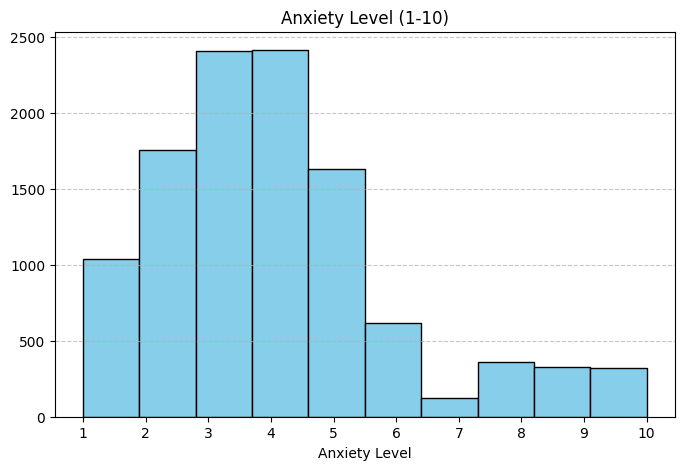

In [12]:
plt.figure(figsize=(8,5))
plt.hist(df["Anxiety Level (1-10)"], bins=10, color="skyblue", edgecolor="black")

plt.title("Anxiety Level (1-10)")
plt.xlabel("Anxiety Level")
plt.xticks(range(1, 11))  # biar sumbu X pas dari 1 sampai 10
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

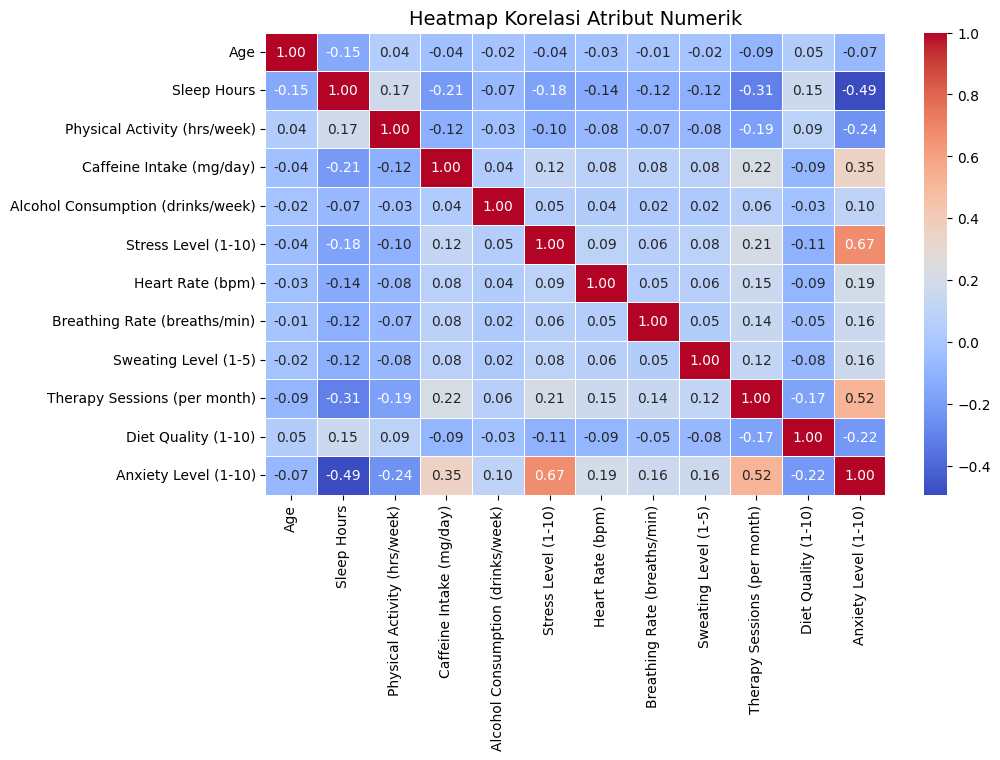

In [14]:
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['int64','float64'])

# Hitung korelasi
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap Korelasi Atribut Numerik", fontsize=14)
plt.show()

##  Kesimpulan Analisis Data

1. **Distribusi Anxiety Level (1-10)**  
   - Berdasarkan histogram, mayoritas responden memiliki tingkat kecemasan pada rentang **3 sampai 5**.  
   - Hanya sedikit responden dengan tingkat kecemasan sangat tinggi (**8–10**) maupun sangat rendah (**1–2**).  
   - Distribusi ini menunjukkan pola miring ke kanan, artinya lebih banyak individu berada pada kategori kecemasan rendah hingga sedang.

2. **Korelasi antar variabel (Heatmap)**  
   - **Stress Level (1-10)** memiliki korelasi positif cukup kuat dengan **Anxiety Level (1-10)** (**r = 0.67**).  
     Artinya, semakin tinggi tingkat stres, semakin tinggi pula tingkat kecemasan.  
   - **Sleep Hours** berkorelasi negatif dengan **Anxiety Level (1-10)** (**r = -0.49**).  
     Semakin sedikit waktu tidur, semakin tinggi tingkat kecemasan.  
   - **Therapy Sessions (per month)** memiliki korelasi positif sedang dengan **Anxiety Level (1-10)** (**r = 0.52**).  
     Individu dengan kecemasan tinggi cenderung lebih sering mengikuti terapi.  
   - Variabel lain seperti **Age**, **Heart Rate**, dan **Diet Quality** hanya memiliki korelasi lemah dengan kecemasan.

3. **Insight Utama**  
   - Faktor paling berpengaruh terhadap kecemasan adalah **stres dan kualitas tidur**.  
   - Intervensi berupa **manajemen stres** dan **perbaikan pola tidur** berpotensi efektif untuk menurunkan tingkat kecemasan responden.
